In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Electric_Vehicle_Population.csv')

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3MW5P9J05N,Arapahoe,Englewood,CO,80111.0,2022,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,200589147,POINT (-104.89239 39.61914),NaN,8.005007e+09
1,5YJXCBE27J,Island,Greenbank,WA,98253.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10.0,326880081,POINT (-122.575569 48.08489),NaN,5.302997e+10
2,1N4AZ0CP3F,Kings,Lemoore,CA,93245.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,NaN,182237457,POINT (-119.78637 36.30101),NaN,6.031980e+09
3,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
4,5YJ3E1EB1K,Alameda,Berkeley,CA,94710.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,320914072,POINT (-122.300531 37.869271),NaN,6.001423e+09


In [4]:
df.shape

(109481, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109481 entries, 0 to 109480
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         109481 non-null  object 
 1   County                                             109480 non-null  object 
 2   City                                               109480 non-null  object 
 3   State                                              109481 non-null  object 
 4   Postal Code                                        109480 non-null  float64
 5   Model Year                                         109481 non-null  int64  
 6   Make                                               109481 non-null  object 
 7   Model                                              109474 non-null  object 
 8   Electric Vehicle Type                              109481 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,109480.000000,109481.000000,109481.000000,109481.000000,109205.000000,1.094810e+05,1.094800e+05
mean,98157.012943,2018.899197,90.211425,1849.194609,29.824120,1.984476e+08,5.296849e+10
std,2640.605503,2.872853,102.575715,10946.085012,14.679959,9.561719e+07,1.675104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.467313e+08,5.303301e+10
50%,98121.000000,2019.000000,35.000000,0.000000,34.000000,1.874118e+08,5.303303e+10
75%,98370.000000,2021.000000,208.000000,0.000000,43.000000,2.169176e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [8]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 1
City                                                   1
State                                                  0
Postal Code                                            1
Model Year                                             0
Make                                                   0
Model                                                  7
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 276
DOL Vehicle ID                                         0
Vehicle Location                                      25
Electric Utility                                     428
2020 Census Tract                                      1
dtype: int64

In [10]:
((df.isnull().sum())/len(df))*100

VIN (1-10)                                           0.000000
County                                               0.000913
City                                                 0.000913
State                                                0.000000
Postal Code                                          0.000913
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.006394
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.252099
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.022835
Electric Utility                                     0.390935
2020 Cen

In [11]:
df['County'].fillna('Unknown', inplace = True)

In [12]:
df['City'].fillna('Unknown', inplace = True)

In [13]:
df['Postal Code'].fillna(0, inplace=True)

In [14]:
df['Model'].fillna('Unknown', inplace=True)

<AxesSubplot:xlabel='Legislative District', ylabel='Count'>

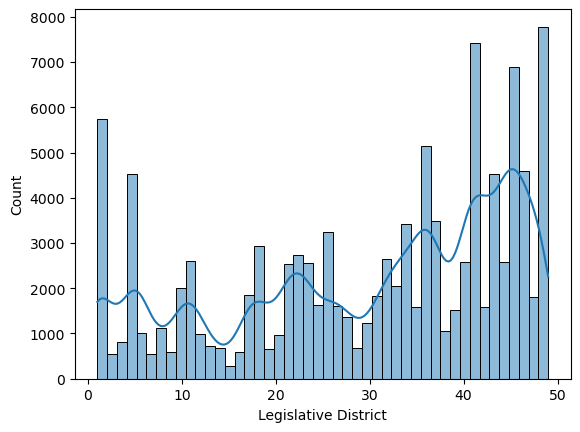

In [15]:
sns.histplot(df['Legislative District'],kde = True)

In [16]:
df['Legislative District'].fillna(0, inplace=True)

In [17]:
df['Vehicle Location'].fillna('Unknown',inplace=True)

In [18]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
109476,KM8K33AGXN,Whatcom,Bellingham,WA,98229.0,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,176212200,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
109477,5YJ3E1EB2N,King,Sammamish,WA,98075.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,185637224,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
109478,5YJYGDEE9M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,153892070,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,5.306105e+10
109479,1N4AZ1CP0J,King,Shoreline,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,289064191,POINT (-122.343983 47.739969),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
109480,5YJYGDEE2M,Benton,Richland,WA,99354.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,171199227,POINT (-119.26844 46.31484),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,5.300501e+10


In [19]:
df['Electric Utility'].fillna('Unknown',inplace=True)

In [27]:
df['2020 Census Tract'].fillna(df['2020 Census Tract'].median(),inplace=True)

In [29]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [22]:
df.duplicated().sum()

0

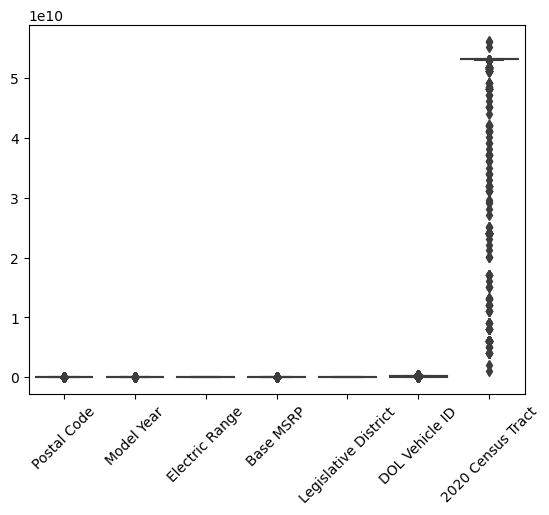

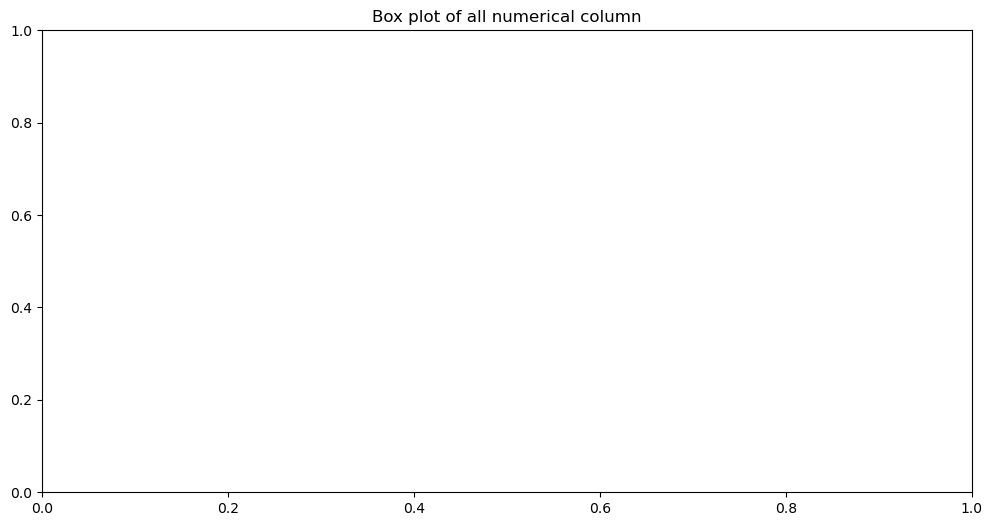

In [23]:
num_col = df.select_dtypes(include=['float64','int64'])
sns.boxplot(data=num_col)
plt.xticks(rotation=45)
plt.figure(figsize=(12,6))
plt.title('Box plot of all numerical column')
plt.show()

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2020 Census Tract'>

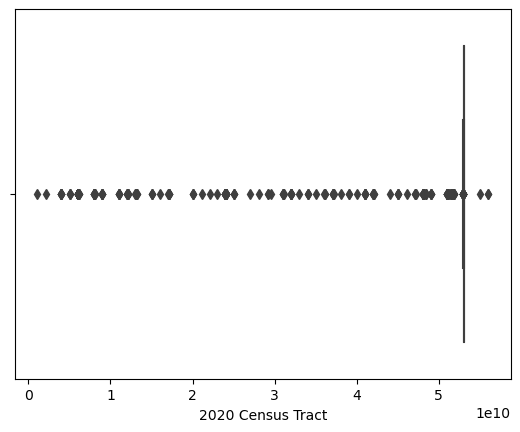

In [24]:
sns.boxplot(df['2020 Census Tract'])

In [30]:
df['2020 Census Tract'].max(), df['2020 Census Tract'].min(), df['2020 Census Tract'].mean()

(56033000100.0, 1101001400.0, 52968493991.574265)

In [37]:
Q1 = df['2020 Census Tract'].quantile(0.25)
Q3 = df['2020 Census Tract'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5

outlier = df[(df['2020 Census Tract']<lower_bound)|(df['2020 Census Tract']>upper_bound)]
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of Outliers: {len(outlier)}')
print(f'Percentage of outliers: {((len(outlier)/len(df))*100)}')

Lower Bound: 53002912491.0
Upper Bound: 53083168515.0
Number of Outliers: 310
Percentage of outliers: 0.2831541546021684


In [42]:
outliers = df[(df['2020 Census Tract'] < 10) | (df['2020 Census Tract'] > 999999)]
print(len(outliers))

109481


##### Census Tract IDs are usually six-digit numbers, values like 56033000100.0 and 1101001400.0 seem to have extra digits, likely   due to:
- Data entry errors (extra digits added mistakenly).
- Incorrect data type conversion (floats instead of integers).
- Concatenation mistakes (other identifiers mistakenly combined).

In [43]:
df['2020 Census Tract'] = df['2020 Census Tract'].astype(str).str[:6]

In [44]:
df['2020 Census Tract'] = df['2020 Census Tract'].astype(int)

In [45]:
outliers = df[(df['2020 Census Tract'] < 10) | (df['2020 Census Tract'] > 999999)]
print(len(outliers))

0


In [46]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
109476,KM8K33AGXN,Whatcom,Bellingham,WA,98229.0,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,176212200,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,530730
109477,5YJ3E1EB2N,King,Sammamish,WA,98075.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,185637224,POINT (-122.028168 47.586173),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),530330
109478,5YJYGDEE9M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,153892070,POINT (-122.212105 47.792368),PUGET SOUND ENERGY INC,530610
109479,1N4AZ1CP0J,King,Shoreline,WA,98133.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,289064191,POINT (-122.343983 47.739969),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),530330
109480,5YJYGDEE2M,Benton,Richland,WA,99354.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,8.0,171199227,POINT (-119.26844 46.31484),BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...,530050


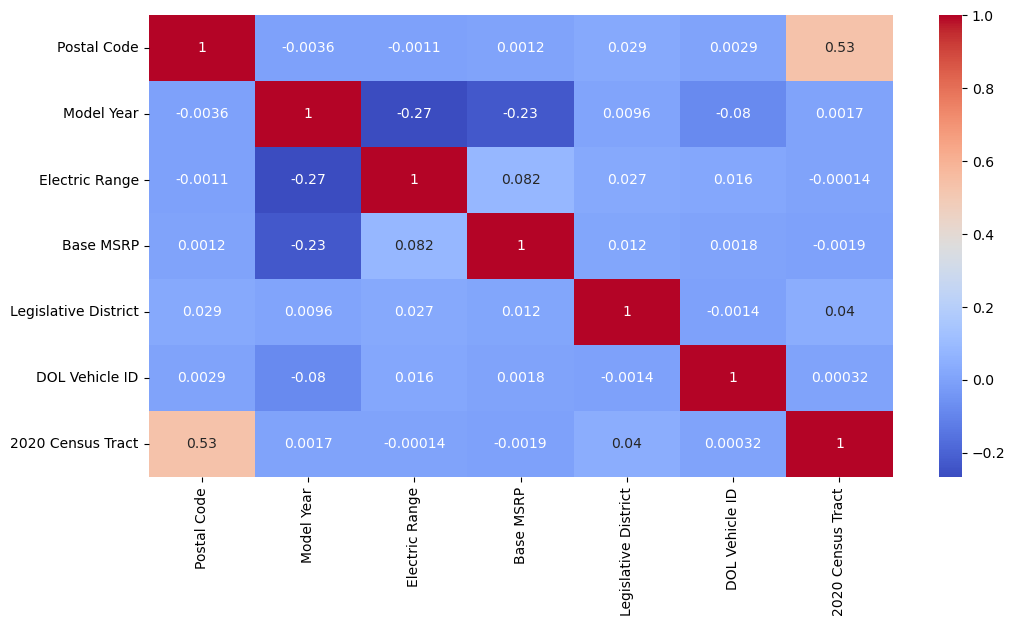

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()